In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Api fetch
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 89% 145M/163M [00:00<00:00, 260MB/s]
100% 163M/163M [00:00<00:00, 224MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image


In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[:5])
len(with_mask_files)

['with_mask_836.jpg', 'with_mask_2517.jpg', 'with_mask_635.jpg', 'with_mask_885.jpg', 'with_mask_1498.jpg']


3725

In [ ]:
with_out_mask_files=os.listdir('/content/data/without_mask')
print(with_out_mask_files[:5])
len(with_out_mask_files)

['without_mask_295.jpg', 'without_mask_3135.jpg', 'without_mask_1384.jpg', 'without_mask_1601.jpg', 'without_mask_591.jpg']


3828

In [ ]:
# label for Image
with_mask_label=[1]*3725

In [ ]:
with_out_mask_label=[0]*3828

In [ ]:
print(with_mask_label[0:5])
print(with_out_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels=with_mask_label+with_out_mask_label

In [ ]:
print(len(labels))

7553


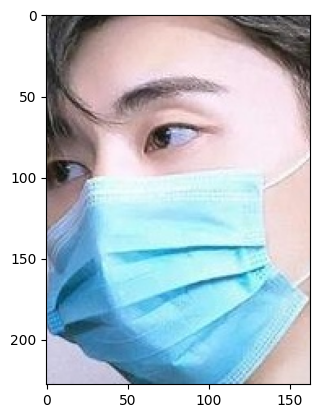

In [ ]:
img=mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot=plt.imshow(img)
plt.show()

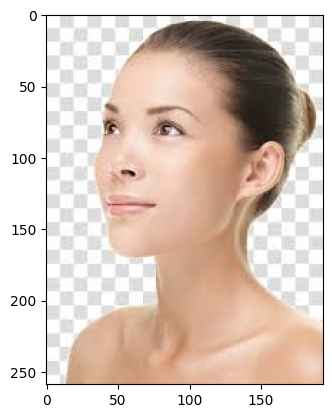

In [ ]:
img=mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot=plt.imshow(img)
plt.show()

In [ ]:
# Image Preprocessing

In [ ]:
with_mask_path=('/content/data/with_mask/')
data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path=('/content/data/without_mask/')


for img_file in with_out_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [215, 215, 215],
        [215, 215, 217],
        [215, 215, 217]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [215, 215, 215],
        [215, 215, 217],
        [215, 215, 217]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [215, 215, 215],
        [215, 215, 217],
        [215, 215, 217]],

       ...,

       [[187, 161, 136],
        [187, 161, 136],
        [187, 161, 136],
        ...,
        [135, 103,  80],
        [136, 104,  81],
        [137, 105,  82]],

       [[185, 159, 134],
        [185, 159, 134],
        [185, 159, 134],
        ...,
        [133, 101,  78],
        [134, 102,  79],
        [136, 104,  81]],

       [[186, 160, 135],
        [186, 160, 135],
        [185, 159, 134],
        ...,
        [134, 102,  79],
        [131,  99,  76],
        [137, 105,  82]]], dtype=uint8)
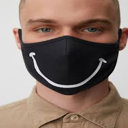

In [ ]:
data[0]

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape

(7553, 128, 128, 3)

In [ ]:
Y.shape

(7553,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
X_train.shape

(6042, 128, 128, 3)

In [ ]:
X_test.shape


(1511, 128, 128, 3)

In [ ]:
# Scaled the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers

In [ ]:
data_augmentation = models.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),  # Randomly shift the image in height and width
        layers.RandomContrast(0.1),          # Adjust contrast by a factor of up to 10%
        layers.RandomBrightness(0.1),        # Randomly alter brightness within the range
        layers.RandomCrop(180, 180),         # Randomly crop to a specific size (if input images are larger)
    ]
)


In [ ]:
num_classes=2
model=models.Sequential()
data_augmentation,
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(X_train_scaled,Y_train,epochs=8, validation_split=0.1,batch_size=5)

Epoch 1/8
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5495 - loss: 0.7390 - val_accuracy: 0.6909 - val_loss: 0.6016
Epoch 2/8
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7255 - loss: 0.5686 - val_accuracy: 0.8595 - val_loss: 0.3670
Epoch 3/8
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8684 - loss: 0.3402 - val_accuracy: 0.8198 - val_loss: 0.5402
Epoch 4/8
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8958 - loss: 0.2500 - val_accuracy: 0.9008 - val_loss: 0.2472
Epoch 5/8
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9113 - loss: 0.2285 - val_accuracy: 0.8479 - val_loss: 0.3526
Epoch 6/8
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9240 - loss: 0.1984 - val_accuracy: 0.7983 - val_loss: 0.7127
Epoch 7/8
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9367 - loss: 0.1723 - val_accuracy: 0.9074 - val_loss: 0.3518
Epoch 8/8
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9469 - loss: 0.1489 - va

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9133 - loss: 0.2591


Path of the image to be predicted: /content/114.png


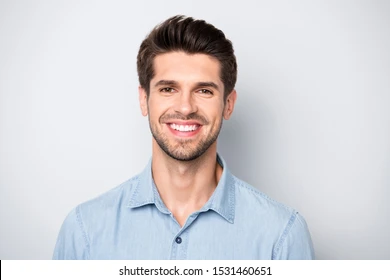

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[[0.62880045 0.5430463 ]]
0
The person in the image is not wearing a mask


In [ ]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


Path of the image to be predicted: /content/111.jpg


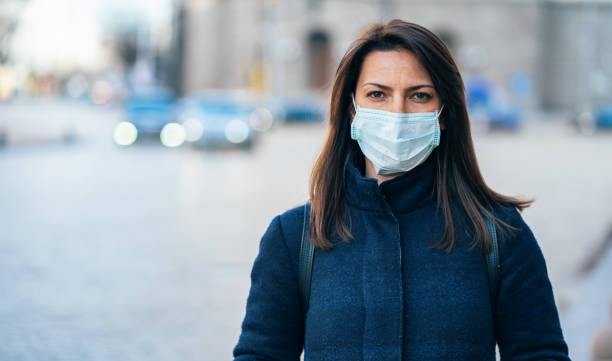

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.4583475  0.80888486]]
1
The person in the image is wearing a mask


In [ ]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
